## Point Cloud

In [22]:
def plot_pc_and_diagram(pc):
    import matplotlib.pyplot as plt 
    from ripser import ripser
    from persim import plot_diagrams
    final_dgm = ripser(pc)['dgms']
    
    fig, ax = plt.subplots(ncols=2,figsize=(12,6))
    pc_ax, dgm_ax = ax[0],ax[1]
    pc_ax.scatter(pc[:,0],pc[:,1])
    pc_ax.set_xticks([])
    pc_ax.set_yticks([])
    plot_diagrams(final_dgm,ax=dgm_ax)
    return fig

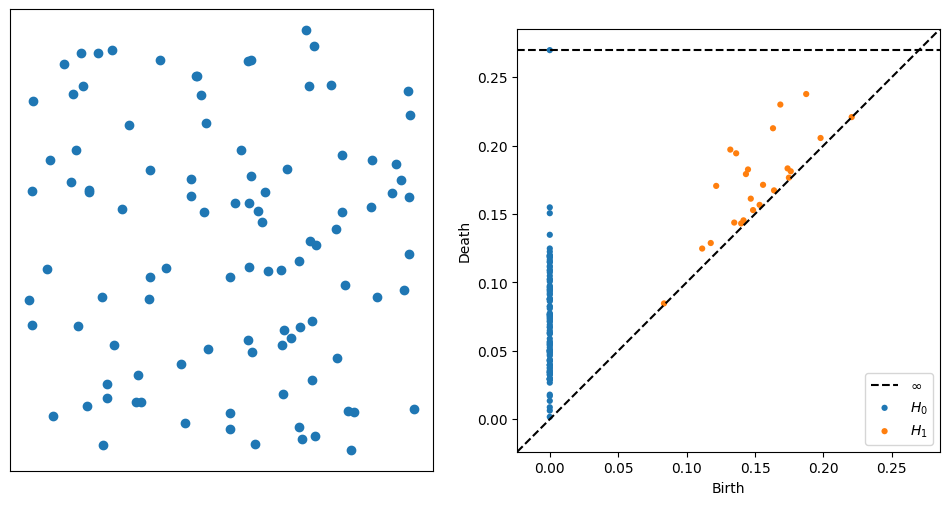

In [27]:
from topologylayer.nn import AlphaLayer, BarcodePolyFeature
import torch, numpy as np, matplotlib.pyplot as plt

# random pointcloud
np.random.seed(0)
data = np.random.rand(100, 2)
fig = plot_pc_and_diagram(data)



In [29]:
# optimization to increase size of holes
layer = AlphaLayer(maxdim=1)
x = torch.autograd.Variable(torch.tensor(data).type(torch.float), requires_grad=True)
f1 = BarcodePolyFeature(1,2,0)
optimizer = torch.optim.Adam([x], lr=1e-2)
# Optimizer Loop
for i in range(100):
    optimizer.zero_grad()
    diagram = layer(x)
    loss = -f1(layer(x))
    loss.backward()
    optimizer.step()

In [30]:

final_pc = x.detach().numpy()


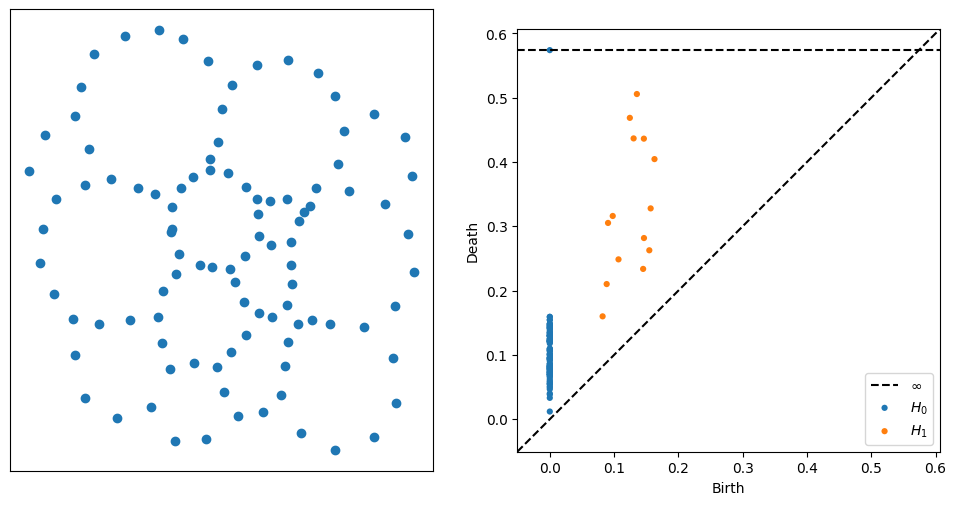

In [31]:
fig = plot_pc_and_diagram(final_pc)


### Plot gradients on Diagrams

In [8]:
from topologylayer.nn import AlphaLayer, BarcodePolyFeature
import torch, numpy as np, matplotlib.pyplot as plt

# random pointcloud
np.random.seed(0)
data = np.random.rand(100, 2)

# optimization to increase size of holes
layer = AlphaLayer(maxdim=1)
x = torch.autograd.Variable(torch.tensor(data).type(torch.float), requires_grad=True)
f1 = BarcodePolyFeature(1,2,0)
diagrams = layer(x)
loss = -f1(diagrams)
grads = torch.autograd.grad(loss, diagrams[0][1]) ## Extract Gradients in dimension 1

In [9]:
diagrams = [ dgm.detach().numpy() for dgm in diagrams[0]]
np_grads = grads[0].numpy()

/tmp/ipykernel_8389/2493380751.py:3: RuntimeWarning: invalid value encountered in divide
  norm_grads = np_grads/np.linalg.norm(np_grads,axis=1,keepdims=True)


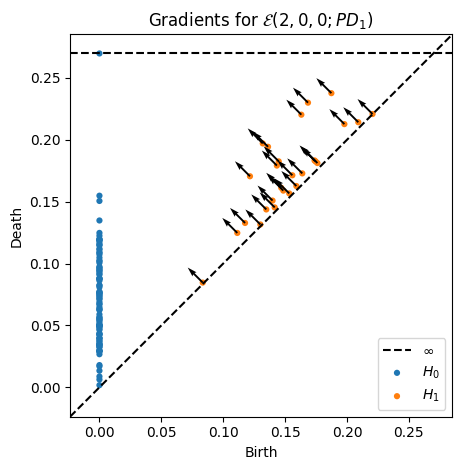

In [13]:
from persim import plot_diagrams

norm_grads = np_grads/np.linalg.norm(np_grads,axis=1,keepdims=True)
dgms_1 = diagrams[1][np.linalg.norm(np_grads,axis=1) > 0] #Only plot diagrams with non-trivial gradient
norm_grads = norm_grads[np.linalg.norm(np_grads,axis=1) > 0] #normalize gradients to show direction
plot_diagrams(diagrams=[diagrams[0],dgms_1])

plt.quiver(dgms_1[:,0],dgms_1[:,1],-norm_grads[:,0],-norm_grads[:,1],width=5e-3)
plt.title(f"Gradients for $\mathcal{{E}}(2,0,0;PD_1)$")
plt.tight_layout()